# Brest Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import pyMechkar as pyMechkar
from pyMechkar import analysis

In [2]:
df = pd.read_csv("c:/Users/Mayer/Documents/DataScience/project/Noshows/NoShow_dfenc.csv")

In [3]:
df.head()

,NoShow,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days_1,cancel_days_2,cancel_days_3,cancel_days_4,cancel_days_5,cancel_days_6,cancel_days_7,service_CAL,service_CALC,service_CAS,service_CBAL,service_CCAMO,service_CCO,service_CDPB,service_CFC,service_CHLFH,service_CHLFHC,service_CHLHH,service_CHLHHC,service_CHLPHC,service_CHLPL,service_CMT,service_CON,service_CT,service_CTU,service_EXT,service_FF,service_FRI,service_MISC,service_NECK,service_SBD,service_SBD5,...,service_SHCM,service_SHCW,service_SMARTBOND,service_SMO,service_SSUD,staff_BECKY,staff_HOUSE,staff_JJ,staff_JOANNE,staff_KELLY,staff_SINEAD,Canceled_By_BECKY,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,amount,avg_receipt_1,avg_receipt_2,avg_receipt_3,avg_receipt_4,avg_receipt_5,avg_quantity_1,avg_quantity_2,avg_quantity_3,avg_quantity_4,avg_quantity_5,total_cancel12,hclust3,hclust4,Mclust3,Mclust4
0,1,0,0,0,0,1,0,720,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.382199,1,0,0,0,0,1,0,0,0,0,0.000000,1,1,1,3
1,0,0,0,0,0,1,0,1080,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.418841,1,0,0,0,0,1,0,0,0,0,0.000000,2,2,2,2
2,0,0,0,1,0,0,0,640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.572154,0,0,1,0,0,0,1,0,0,0,0.693147,1,1,1,4
3,0,0,0,1,0,0,0,790,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.572154,0,0,0,1,0,0,0,1,0,0,0.693147,3,3,3,3
4,0,0,0,1,0,0,0,780,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3.583519,0,0,0,0,1,0,0,0,1,0,0.693147,3,3,3,3


In [4]:
df.describe()

,NoShow,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days_1,cancel_days_2,cancel_days_3,cancel_days_4,cancel_days_5,cancel_days_6,cancel_days_7,service_CAL,service_CALC,service_CAS,service_CBAL,service_CCAMO,service_CCO,service_CDPB,service_CFC,service_CHLFH,service_CHLFHC,service_CHLHH,service_CHLHHC,service_CHLPHC,service_CHLPL,service_CMT,service_CON,service_CT,service_CTU,service_EXT,service_FF,service_FRI,service_MISC,service_NECK,service_SBD,service_SBD5,...,service_SHCM,service_SHCW,service_SMARTBOND,service_SMO,service_SSUD,staff_BECKY,staff_HOUSE,staff_JJ,staff_JOANNE,staff_KELLY,staff_SINEAD,Canceled_By_BECKY,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,amount,avg_receipt_1,avg_receipt_2,avg_receipt_3,avg_receipt_4,avg_receipt_5,avg_quantity_1,avg_quantity_2,avg_quantity_3,avg_quantity_4,avg_quantity_5,total_cancel12,hclust3,hclust4,Mclust3,Mclust4
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.00000,2184.000000,2184.000000,2184.000000,2184.000000,2184.0,2184.0,2184.000000,2184.000000,2184.0,2184.000000,2184.000000,...,2184.000000,2184.000000,2184.000000,2184.000000,2184.0,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.0,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,0.078297,0.029762,0.000458,0.145604,0.208333,0.215201,0.196886,807.971612,0.061355,0.016484,0.008242,0.006410,0.014194,0.018773,0.874542,0.002747,0.018315,0.000458,0.010989,0.008700,0.000916,0.006410,0.030220,0.006410,0.000458,0.002747,0.001374,0.008242,0.02381,0.005495,0.042582,0.004579,0.049908,0.0,0.0,0.003663,0.001374,0.0,0.175366,0.008700,...,0.213828,0.360348,0.004579,0.001374,0.0,0.236264,0.009615,0.375458,0.137821,0.147436,0.092949,0.013278,0.0,0.042582,0.007784,0.014652,0.007326,0.000458,0.508700,0.210623,0.045330,0.010989,0.008700,0.215201,3.982512,0.386447,0.194139,0.192308,0.190934,0.036172,0.397894,0.199176,0.199176,0.198718,0.005037,0.703476,1.916209,2.240385,1.913462,2.639652
std,0.268699,0.169969,0.021398,0.352790,0.406209,0.411056,0.397737,175.008035,0.240036,0.127355,0.090430,0.079825,0.118318,0.135753,0.331313,0.052354,0.134119,0.021398,0.104275,0.092886,0.030254,0.079825,0.171231,0.079825,0.021398,0.052354,0.037045,0.090430,0.15249,0.073938,0.201960,0.067527,0.217806,0.0,0.0,0.060426,0.037045,0.0,0.380367,0.092886,...,0.410101,0.480211,0.067527,0.037045,0.0,0.424883,0.097608,0.484352,0.344790,0.354621,0.290427,0.114490,0.0,0.201960,0.087902,0.120183,0.085298,0.021398,0.500039,0.407844,0.208074,0.104275,0.092886,0.411056,1.398027,0.487047,0.395627,0.394204,0.393127,0.186761,0.489575,0.399472,0.399472,0.399127,0.070806,1.056928,0.902398,1.043005,0.839542,1.131202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [5]:
df.isna().sum()

NoShow            0
sunday            0
monday            0
wednesday         0
thursday          0
                 ..
total_cancel12    0
hclust3           0
hclust4           0
Mclust3           0
Mclust4           0
Length: 82, dtype: int64

In [6]:
df2 = df.copy()
df2['NoShow'] = df2['NoShow'].astype('category')

In [7]:
#sns.pairplot(df2,hue="Classification")

## k-means

In [8]:
from sklearn.cluster import KMeans

C:\Users\Mayer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
wcss = []
for i in range(1, 80):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,1:80])
    wcss.append(kmeans.inertia_)
    

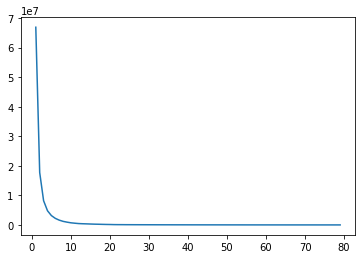

In [16]:
sns.lineplot(x=range(1,80), y=wcss)

In [18]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:80])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
df2['cluster'] = kmeans.labels_

In [ ]:
sns.pairplot(df2,hue="cluster")

In [124]:
pd.crosstab(df2.cluster,df2.Classification)

/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


Classification,1,2
cluster,,
0,1,8
1,21,16
2,12,25
3,4,4
4,0,3
5,14,8


In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [137]:
linked = linkage(df.iloc[:,0:8], 'ward')

labelList = range(2, 15)

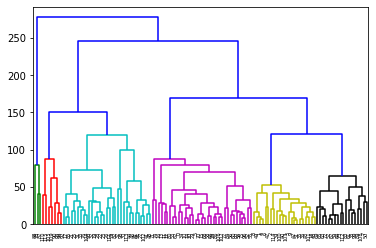

In [225]:
dn = dendrogram(linked,color_threshold=120)


In [238]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [239]:
pd.crosstab(df2.hcluster,df2.Classification)

/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


Classification,1,2
hcluster,,
1,0,3
2,0,7
3,18,13
4,13,22
5,18,4
6,3,15


In [240]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,0,5,0,1,0,3
1,0,0,4,0,22,11
2,0,0,0,33,0,4
3,0,2,6,0,0,0
4,3,0,0,0,0,0
5,0,0,21,1,0,0


In [241]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,2.215517,4.034483
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,1.575939,1.250607
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000,3.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000,4.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,3.000000,5.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,5.000000,6.000000


In [242]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,1,5


# Partition of the data

In [274]:
from sklearn.model_selection import train_test_split

In [261]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [262]:
X = df2.loc[:,nv]
y = df2.Classification

In [263]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [264]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

In [284]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1])

In [286]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[5.79487604e-01, 4.20512396e-01],
       [2.90438214e-01, 7.09561786e-01],
       [3.57005963e-01, 6.42994037e-01],
       [3.25823385e-01, 6.74176615e-01],
       [1.68577954e-01, 8.31422046e-01],
       [6.60247712e-01, 3.39752288e-01],
       [8.61245350e-01, 1.38754650e-01],
       [7.04356294e-01, 2.95643706e-01],
       [2.30371332e-01, 7.69628668e-01],
       [7.23143066e-07, 9.99999277e-01],
       [2.57113550e-02, 9.74288645e-01],
       [9.00468078e-01, 9.95319216e-02],
       [6.29044058e-01, 3.70955942e-01],
       [2.85735354e-02, 9.71426465e-01],
       [3.15996004e-06, 9.99996840e-01],
       [2.26557841e-01, 7.73442159e-01],
       [3.91405032e-01, 6.08594968e-01],
       [1.32085768e-01, 8.67914232e-01],
       [1.50002826e-01, 8.49997174e-01],
       [2.63595591e-01, 7.36404409e-01],
       [4.24231183e-01, 5.75768817e-01],
       [8.61951919e-01, 1.38048081e-01],
       [3.07628227e-01, 6.92371773e-01],
       [7.20419762e-01, 2.79580238e-01],
       [2.483831

In [287]:
pd.crosstab(y_train,yhat1)

/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


col_0,1,2
Classification,,
1,19,11
2,7,32


In [288]:
### Accuracy:
mod1.score(X_train,y_train)

0.7391304347826086

In [290]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

0.7269230769230769
0.7327272727272727


In [289]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7446808510638298


/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


col_0,1,2
Classification,,
1,12,10
2,2,23


In [292]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [293]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [295]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727},
 2: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727}}